In [2]:
from uncertainties import ufloat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = {
    "shaping time": 
    [0.5, 1, 2, 3, 6, 10],
    "ctr": 
    [ufloat(5102.38, 0.176), ufloat(5095.77, 0.087), ufloat(5263.71, 0.076), ufloat(5180.92, 0.078), ufloat(5058.48, 0.078), ufloat(4977.23, 0.200)],
    "fwhm":
    [ ufloat(75.48, 0.372), ufloat(33.03, 0.167), ufloat(25.25, 0.141), ufloat(25.92, 0.146), ufloat(17.40, 0.106), ufloat(55.89, 0.395),]
}


df = pd.DataFrame(data)
df['x'] = df["fwhm"] /  df["ctr"]
df

,shaping time,ctr,fwhm,x
0,0.5,5102.38+/-0.18,75.5+/-0.4,0.01479+/-0.00007
1,1.0,5095.77+/-0.09,33.03+/-0.17,0.006482+/-0.000033
2,2.0,5263.71+/-0.08,25.25+/-0.14,0.004797+/-0.000027
3,3.0,5180.92+/-0.08,25.92+/-0.15,0.005003+/-0.000028
4,6.0,5058.48+/-0.08,17.40+/-0.11,0.003440+/-0.000021
5,10.0,4977.23+/-0.20,55.9+/-0.4,0.01123+/-0.00008


In [4]:
# kalibracja położenia peaku

# x dla 1332 keV, jak wiemy, że dla 8000 jest 5000
x = 8000*1332/5000
x = int(x)
x

2131

# Kalibracja detektora

## Kobalt 60 27Co
przy spadku z 4+ na 2+ na 0 czasami oba są zmierzone jednocześnie, tego szukamy

In [5]:
# gdzie spodziewamy się tego peaku?
peak1 = 1878.85
peak2 = 2131.73

peak_3_guess = peak1 + peak2
peak_3_guess

# there is a peak at _, we know it is the one we are looking for

4010.58

In [6]:
def peak(keV):
    return int(8000 * keV / 5000)

def value_at(peak):
    return peak * 5000 / 8000

print(f"we expect to find the peak for Deuter at position {peak(2200)}.")
print(f"we expect to find the peak for 60Co at position {peak(2505.766)}.")
print(f"we expect to find the peak for 137Cs at position {peak(661.660)}.")
print(f"we expect to find the peak for 22Na at position {peak(1274.53)}.")
print("")
print(f"we expect to find the peak for 133Ba_356 at position {peak(356.017)}.")
print(f"we expect to find the peak for 133Ba_80 at position {peak(80.9971)}.")
print(f"we expect to find the peak for 133Ba_302 at position {peak(302.853)}.")
print(f"we expect to find the peak for 133Ba_383 at position {peak(383.851)}.")
print(f"we expect to find the peak for 133Ba_276 at position {peak(276.398)}.")

value_at(150)

we expect to find the peak for Deuter at position 3520.
we expect to find the peak for 60Co at position 4009.
we expect to find the peak for 137Cs at position 1058.
we expect to find the peak for 22Na at position 2039.

we expect to find the peak for 133Ba_356 at position 569.
we expect to find the peak for 133Ba_80 at position 129.
we expect to find the peak for 133Ba_302 at position 484.
we expect to find the peak for 133Ba_383 at position 614.
we expect to find the peak for 133Ba_276 at position 442.


93.75

In [7]:
# dla Kobaltu trzeba w domu ROC policzyć

data = {
    "pierwiastek": 
    ["60Co", "137Cs", "22Na",
     "133Ba_356", "133Ba_80", "133Ba_302",
     "133Ba_383", "133Ba_276"],

    "wartość kalibracyjna":
    [2505.766, 661.660, 1274.53,
     356.017, 80.9971, 302.853,
     383.851, 276.398],

    "ctr": 
    [ufloat(3994.32, 0.033), ufloat(1066.28, 0.004), ufloat(2039.21, 0.044),
     ufloat(581.34, 0.005), ufloat(145.01, 0.016), ufloat(497.01, 0.008),
     ufloat(625.45, 0.013), ufloat(455.05, 0.015)],

    "fwhm":
    [ufloat(10.43, 0.082), ufloat(4.59, 0.006), ufloat(8.39, 0.107),
     ufloat(3.47, 0.012), ufloat(2.62, 0.039), ufloat(3.26, 0.019),
     ufloat(3.55, 0.031), ufloat(3.18, 0.035)]
}

deuter_ctr = ufloat(3545.73, 0.026)
deuter_Fwhm = ufloat(12.76, 0.053)

df = pd.DataFrame(data)

show_Cs = True
if not show_Cs:
    mask = df["pierwiastek"] != "137Cs"
    df = df[mask]

df

,pierwiastek,wartość kalibracyjna,ctr,fwhm
0,60Co,2505.7660,3994.320+/-0.033,10.43+/-0.08
1,137Cs,661.6600,1066.280+/-0.004,4.590+/-0.006
2,22Na,1274.5300,2039.21+/-0.04,8.39+/-0.11
3,133Ba_356,356.0170,581.340+/-0.005,3.470+/-0.012
4,133Ba_80,80.9971,145.010+/-0.016,2.62+/-0.04
5,133Ba_302,302.8530,497.010+/-0.008,3.260+/-0.019
6,133Ba_383,383.8510,625.450+/-0.013,3.550+/-0.031
7,133Ba_276,276.3980,455.050+/-0.015,3.180+/-0.035


Fit parameters: m = 0.629912 ± 0.000042, b = -10.177103 ± 0.069548


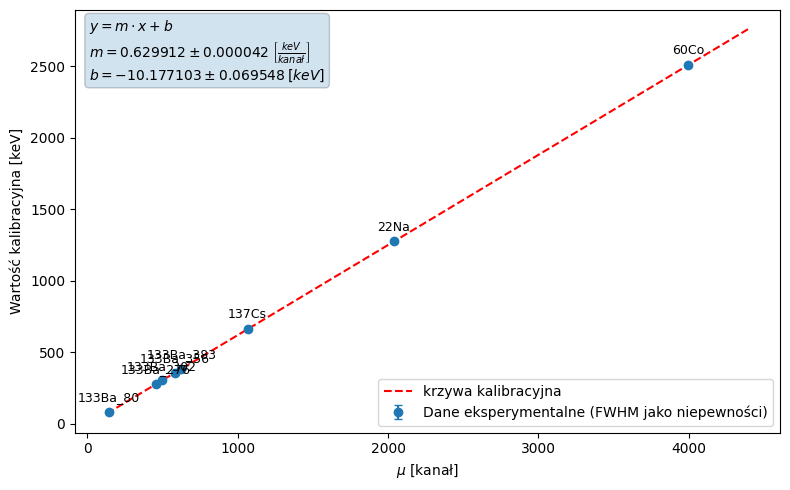

Saved calibration_curve.png


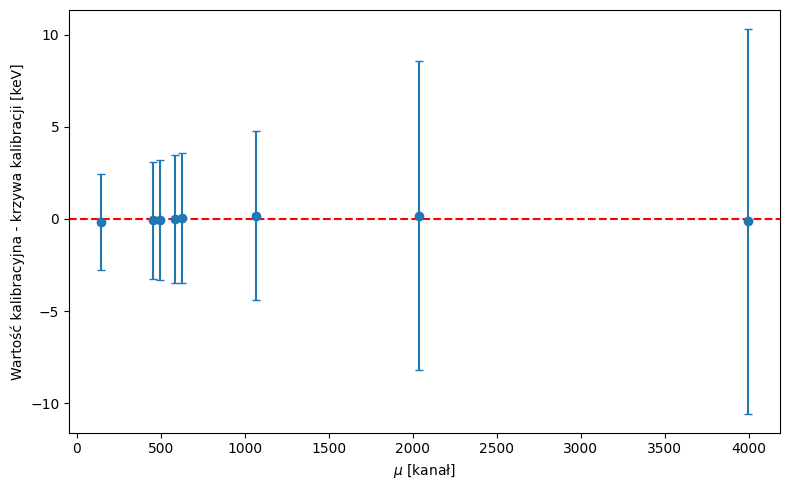

Saved residuals.png


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import unumpy

# Extract data
x = unumpy.nominal_values(df["ctr"].values)                # NEW: x = Ctr
y = df["wartość kalibracyjna"].values                      # NEW: y = wartość kalibracyjna
fwhm = unumpy.nominal_values(df["fwhm"].values)

# Linear function (now fitting y = m*x + b with x = Ctr)
def linear(x, m, b):
    return m * x + b

# Fit ignoring uncertainties
popt, pcov = curve_fit(linear, x, y)
m, b = popt
m_err, b_err = np.sqrt(np.diag(pcov))

print(f"Fit parameters: m = {m:.6f} ± {m_err:.6f}, b = {b:.6f} ± {b_err:.6f}")

# Generate smooth line for plotting
x_smooth = np.linspace(min(x)*0.9, max(x)*1.1, 400)
y_smooth = linear(x_smooth, m, b)

# Calculate residuals
residuals = y - linear(x, m, b)

# ------------------ Plot 1: Calibration curve ------------------
plt.figure(figsize=(8,5))
plt.errorbar(x, y, yerr=fwhm, fmt='o', label='Dane eksperymentalne (FWHM jako niepewności)', capsize=3)
plt.plot(x_smooth, y_smooth, 'r--', label='krzywa kalibracyjna')

# Label each point
for i, label in enumerate(df["pierwiastek"]):
    plt.text(x[i], y[i] + 0.03*max(y), label, ha='center', fontsize=9)

plt.xlabel("$\\mu$ [kanał]")                                 # NEW
plt.ylabel("Wartość kalibracyjna [keV]")                # NEW
# plt.title("Energia w funkcji kanału")
plt.legend()

# Display fit parameters
fit_text = (
    f"$y = m \\cdot x + b$\n"
    f"$m = {m:.6f} \\pm {m_err:.6f}\\;\\left[\\frac{{keV}}{{kanał}}\\right]$\n"
    f"$b = {b:.6f} \\pm {b_err:.6f} \\: [keV]$"
)

plt.gca().text(0.02, 0.98, fit_text, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))

plt.tight_layout()
plt.savefig("calibration_curve.png", dpi=300)
plt.show()
print("Saved calibration_curve.png")

# ------------------ Plot 2: Residuals ------------------
plt.figure(figsize=(8,5))
plt.errorbar(x, residuals, yerr=fwhm, fmt='o', capsize=3)
plt.axhline(0, linestyle='--', color='red')

plt.xlabel("$\\mu$ [kanał]")                                        # NEW
plt.ylabel("Wartość kalibracyjna - krzywa kalibracji [keV]")     # NEW
# plt.title("Residuals (Inverted Axes)")

plt.tight_layout()
plt.savefig("residuals.png", dpi=300)
plt.show()
print("Saved residuals.png")


In [37]:
peaks = [
    ufloat(375, 2),
    ufloat(413.8, 2.3),
    ufloat(476.8, 10.1),
    ufloat(510.9, 3.7),
    ufloat(558.4, 2.7),
    ufloat(846.6, 4.2),
    ufloat(1199.8, 4.9),
    ufloat(1460.8, 6.3),
    ufloat(1711.7, 6.8),
    ufloat(2223.4, 9.2)
]
peaks

[375.0+/-2.0,
 413.8+/-2.3,
 476.8+/-10.1,
 510.9+/-3.7,
 558.4+/-2.7,
 846.6+/-4.2,
 1199.8+/-4.9,
 1460.8+/-6.3,
 1711.7+/-6.8,
 2223.4+/-9.2]